## S14a: Lab 2 - Pricing, houses


### 1. Let's start by reading in our data

In [1]:
# Imports

import numpy as np
import pandas as pd

In [2]:
# Read in data with pandas

data = pd.read_csv('./data/Boston_March2018.csv')

# Preview

data.head()

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
0,72049670,SLD,239900.0,247000.0,8/6/2016,3/1/2018,NaN,295,295,16 Pine St,...,NaN,NaN,NaN,NaN,NaN,MF,Pine St,16,16,http://media.mlspin.com/photo.aspx?mls=72049670
1,72056522,SLD,338000.0,338000.0,8/22/2016,3/1/2018,NaN,545,515,80 Cherry Drive,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,CC,Cherry Drive,80,80,http://media.mlspin.com/photo.aspx?mls=72056522
2,72080286,SLD,2999999.0,2950000.0,10/12/2016,3/1/2018,NaN,504,493,80 Monadnock Road,...,NaN,WPS,WMS,WHS,Basement:Yes;Fireplaces:3;Roof:Asphalt/Fibergl...,SF,Monadnock Road,80,80,http://media.mlspin.com/photo.aspx?mls=72080286
3,72118879,SLD,2600000.0,2600000.0,2/14/2017,3/1/2018,NaN,28,14,15 Trevino Circle,...,NaN,West Elementary,West Middle,Andover High,Basement:Yes;Fireplaces:3;Roof:--;Floor:--;App...,SF,Trevino Circle,15,15,http://media.mlspin.com/photo.aspx?mls=72118879
4,72124101,SLD,525000.0,525000.0,2/28/2017,3/1/2018,NaN,867,287,53 Maple Ridge Rd,...,NaN,NaN,NaN,Northampton,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Maple Ridge Rd,53,53,http://media.mlspin.com/photo.aspx?mls=72124101


In [3]:
# View from another angle

data.iloc[100:].head()
features = ['SOLDPRICE', 'BEDS', 'BATHS', 'SQFT', 'AGE', 'LOTSIZE', 'GARAGE']
data[features]

,SOLDPRICE,BEDS,BATHS,SQFT,AGE,LOTSIZE,GARAGE
0,247000.0,12,4.0,4772,118,8350.0,0
1,338000.0,2,2.0,1545,2,NaN,2
2,2950000.0,5,6.5,6800,10,20564.0,3
3,2600000.0,4,4.5,6000,1,27559.0,3
4,525000.0,3,3.0,2774,28,106286.0,2
...,...,...,...,...,...,...,...
5166,549860.0,3,2.5,2466,0,20037.0,3
5167,135000.0,2,1.0,1150,68,7744.0,0
5168,616500.0,2,2.0,1156,50,58806.0,0
5169,369000.0,4,1.5,1818,40,32234.0,0


### 2. Explore the data

In [4]:
# Narrow the view

prices = ['LISTPRICE', 'SOLDPRICE']
data[prices].head()

,LISTPRICE,SOLDPRICE
0,239900.0,247000.0
1,338000.0,338000.0
2,2999999.0,2950000.0
3,2600000.0,2600000.0
4,525000.0,525000.0


In [5]:
# !YOUR TURN!
# Look at sum
print(np.sum(data[prices]))

# Look at mean
np.mean(data[prices])

LISTPRICE    2.486085e+09
SOLDPRICE    2.464492e+09
dtype: float64


LISTPRICE    480774.491561
SOLDPRICE    476598.774637
dtype: float64

In [6]:
# Let's take a look at the property types

proptypes = data.PROPTYPE.unique()
proptypes

array(['MF', 'CC', 'SF'], dtype=object)

In [7]:
data[(data.SOLDPRICE > 1000000) & (data.PROPTYPE == "SF")]

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
2,72080286,SLD,2999999.0,2950000.00,10/12/2016,3/1/2018,NaN,504,493,80 Monadnock Road,...,NaN,WPS,WMS,WHS,Basement:Yes;Fireplaces:3;Roof:Asphalt/Fibergl...,SF,Monadnock Road,80,80,http://media.mlspin.com/photo.aspx?mls=72080286
3,72118879,SLD,2600000.0,2600000.00,2/14/2017,3/1/2018,NaN,28,14,15 Trevino Circle,...,NaN,West Elementary,West Middle,Andover High,Basement:Yes;Fireplaces:3;Roof:--;Floor:--;App...,SF,Trevino Circle,15,15,http://media.mlspin.com/photo.aspx?mls=72118879
8,72157937,SLD,2119000.0,1819000.00,5/3/2017,3/1/2018,NaN,243,233,51 Old Colony Rd,...,NaN,WPS,WMS,WHS,"Basement:Yes;Fireplaces:3;Roof:Slate, Rubber;F...",SF,Old Colony Rd,51,51,http://media.mlspin.com/photo.aspx?mls=72157937
16,72191694,SLD,1599900.0,1370000.00,6/29/2017,3/1/2018,NaN,1408,207,54 Border St,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:8;Roof:Asphalt/Fibergl...,SF,Border St,54,54,http://media.mlspin.com/photo.aspx?mls=72191694
32,72214110,SLD,1400000.0,1365000.00,8/15/2017,3/1/2018,NaN,129,111,27 Duck Blind Rd,...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:4;Roof:Asphalt/Fibergla...,SF,Duck Blind Rd,27,27,http://media.mlspin.com/photo.aspx?mls=72214110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,72286285,SLD,999000.0,1210526.18,2/27/2018,3/29/2018,NaN,8,8,35 Corinthian Rd,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Corinthian Rd,35,35,http://media.mlspin.com/photo.aspx?mls=72286285
5108,72286331,SLD,1189000.0,1289000.00,2/27/2018,3/29/2018,NaN,10,3,41 Forest St,...,NaN,Sprague,WMS,WHS,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Forest St,41,41,http://media.mlspin.com/photo.aspx?mls=72286331
5109,72286368,SLD,2899999.0,2781500.00,2/27/2018,3/30/2018,NaN,10,10,26 Lawrence St,...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:1;Roof:Rubber;Floor:--;...,SF,Lawrence St,26,26,http://media.mlspin.com/photo.aspx?mls=72286368
5111,72286491,SLD,1050000.0,1150000.00,2/27/2018,3/28/2018,NaN,10,7,39 Gilmore Road,...,NaN,Winn Brook,Chenery,Belmont HS,Basement:Yes;Fireplaces:2;Roof:Asphalt/Fibergl...,SF,Gilmore Road,39,39,http://media.mlspin.com/photo.aspx?mls=72286491


In [8]:
# Tinker around with some filtering options

data[(data.SOLDPRICE < 1000000) & (data.PROPTYPE == "SF")]

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
4,72124101,SLD,525000.0,525000.0,2/28/2017,3/1/2018,NaN,867,287,53 Maple Ridge Rd,...,NaN,NaN,NaN,Northampton,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Maple Ridge Rd,53,53,http://media.mlspin.com/photo.aspx?mls=72124101
5,72133120,SLD,468000.0,479000.0,3/20/2017,3/1/2018,NaN,273,273,27 Jennings Way,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Jennings Way,27,27,http://media.mlspin.com/photo.aspx?mls=72133120
6,72148511,SLD,209900.0,176505.0,4/19/2017,3/1/2018,NaN,311,287,26 HATHAWAY STREET,...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:0;Roof:--;Floor:--;Appl...,SF,HATHAWAY STREET,26,26,http://media.mlspin.com/photo.aspx?mls=72148511
7,72153413,SLD,549900.0,530000.0,4/26/2017,3/1/2018,NaN,261,261,9 Sheffield Place,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Sheffield Place,9,9,http://media.mlspin.com/photo.aspx?mls=72153413
9,72166889,SLD,130000.0,130000.0,5/16/2017,3/1/2018,NaN,185,185,88 Marcelle St,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Marcelle St,88,88,http://media.mlspin.com/photo.aspx?mls=72166889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,72297021,SLD,549860.0,549860.0,3/21/2018,3/28/2018,NaN,1,1,55 Goldfinch Drive,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:--;Floor:--;App...,SF,Goldfinch Drive,55,55,http://media.mlspin.com/photo.aspx?mls=72297021
5167,72298565,SLD,97500.0,135000.0,3/26/2018,3/28/2018,NaN,0,0,15 Wood Path,...,NaN,J.R. Briggs,Overlook,Oakmont,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Wood Path,15,15,http://media.mlspin.com/photo.aspx?mls=72298565
5168,72298853,SLD,675000.0,616500.0,3/27/2018,3/30/2018,NaN,2,2,373 Bay Lane,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Bay Lane,373,373,http://media.mlspin.com/photo.aspx?mls=72298853
5169,72299954,SLD,369900.0,369000.0,3/22/2018,3/29/2018,NaN,7,4,17 Rounsevell Dr,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Rounsevell Dr,17,17,http://media.mlspin.com/photo.aspx?mls=72299954


In [9]:
data.iloc[100:]

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
100,72253657,SLD,539000.0,530000.0,11/9/2017,3/1/2018,NaN,97,33,304 Neponset,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:--;Floor:Hardwo...,CC,Neponset,304,304,http://media.mlspin.com/photo.aspx?mls=72253657
101,72255734,SLD,829000.0,787500.0,11/15/2017,3/1/2018,NaN,20,5,73 Thaxter St,...,NaN,Foster,Hingham Middle,Hingham High,Basement:Yes;Fireplaces:2;Roof:Asphalt/Fibergl...,SF,Thaxter St,73,73,http://media.mlspin.com/photo.aspx?mls=72255734
102,72255735,SLD,1799000.0,1734300.0,11/15/2017,3/1/2018,NaN,71,71,15 Dix Street Unit 2,...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:1;Roof:Asphalt/Fibergla...,CC,Dix Street Unit 2,15,15,http://media.mlspin.com/photo.aspx?mls=72255735
103,72255807,SLD,749000.0,780000.0,11/15/2017,3/1/2018,NaN,21,6,30 Spring Lane,...,NaN,Downey,Thurston,WHS,Basement:Yes;Fireplaces:2;Roof:Asphalt/Fibergl...,SF,Spring Lane,30,30,http://media.mlspin.com/photo.aspx?mls=72255807
104,72256216,SLD,619900.0,615000.0,11/16/2017,3/1/2018,NaN,32,20,73 CIRCLE DRIVE,...,NaN,Northeast,Kennedy,Waltham,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,CIRCLE DRIVE,73,73,http://media.mlspin.com/photo.aspx?mls=72256216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,72297021,SLD,549860.0,549860.0,3/21/2018,3/28/2018,NaN,1,1,55 Goldfinch Drive,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:--;Floor:--;App...,SF,Goldfinch Drive,55,55,http://media.mlspin.com/photo.aspx?mls=72297021
5167,72298565,SLD,97500.0,135000.0,3/26/2018,3/28/2018,NaN,0,0,15 Wood Path,...,NaN,J.R. Briggs,Overlook,Oakmont,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Wood Path,15,15,http://media.mlspin.com/photo.aspx?mls=72298565
5168,72298853,SLD,675000.0,616500.0,3/27/2018,3/30/2018,NaN,2,2,373 Bay Lane,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Bay Lane,373,373,http://media.mlspin.com/photo.aspx?mls=72298853
5169,72299954,SLD,369900.0,369000.0,3/22/2018,3/29/2018,NaN,7,4,17 Rounsevell Dr,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Rounsevell Dr,17,17,http://media.mlspin.com/photo.aspx?mls=72299954


In [10]:
# Look at everything

data.describe()

,MLSNUM,LISTPRICE,SOLDPRICE,EXPIREDDATE,DOM,DTO,ZIP,BEDS,BATHS,SQFT,AGE,LOTSIZE,GARAGE,COOLING
count,5.171000e+03,5.171000e+03,5.171000e+03,0.0,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,4.064000e+03,5171.000000,0.0
mean,7.225305e+07,4.807745e+05,4.765988e+05,NaN,69.591762,48.977374,2062.584220,3.253336,2.031038,1883.277703,62.156256,4.236467e+04,0.865597,NaN
std,4.473714e+04,4.945971e+05,5.016361e+05,NaN,92.763384,68.484702,1119.135051,1.604884,1.050722,1038.769455,54.095052,3.790374e+05,0.985542,NaN
min,7.115216e+07,1.990000e+04,2.300000e+04,NaN,0.000000,0.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
25%,7.224754e+07,2.499000e+05,2.450000e+05,NaN,18.000000,6.000000,1747.000000,2.000000,1.500000,1191.000000,27.000000,6.000000e+03,0.000000,NaN
50%,7.226724e+07,3.748000e+05,3.700000e+05,NaN,35.000000,20.000000,2048.000000,3.000000,2.000000,1638.000000,54.000000,1.174600e+04,1.000000,NaN
75%,7.227533e+07,5.499000e+05,5.515000e+05,NaN,94.000000,73.000000,2360.000000,4.000000,2.500000,2300.000000,98.000000,2.570625e+04,2.000000,NaN
max,7.230167e+07,1.050000e+07,1.511000e+07,NaN,1562.000000,938.000000,34452.000000,32.000000,32.000000,11200.000000,1863.000000,1.868724e+07,9.000000,NaN


In [11]:
data.groupby("PROPTYPE")

In [12]:
# Group by prop type

data_by_proptype = data.groupby('PROPTYPE')
data_by_proptype.mean()

,MLSNUM,LISTPRICE,SOLDPRICE,EXPIREDDATE,DOM,DTO,ZIP,BEDS,BATHS,SQFT,AGE,LOTSIZE,GARAGE,COOLING
PROPTYPE,,,,,,,,,,,,,,
CC,7.225364e+07,512072.209661,515437.729363,NaN,54.799169,39.804017,2106.023546,2.087258,1.745845,1328.087950,49.587950,109587.963056,0.542244,NaN
MF,7.225119e+07,498397.169421,493278.811983,NaN,55.506198,41.280992,1997.479339,6.121901,2.927686,2891.136364,108.140496,8466.673120,0.520661,NaN
SF,7.225306e+07,464208.570802,456815.676056,NaN,78.280604,54.210607,2052.958680,3.344434,2.024206,1980.067838,60.889608,40438.179158,1.061055,NaN


In [13]:
# Zoom in

data_by_proptype[['LISTPRICE', 'SOLDPRICE', 'BEDS', 'SQFT']].mean()

,LISTPRICE,SOLDPRICE,BEDS,SQFT
PROPTYPE,,,,
CC,512072.209661,515437.729363,2.087258,1328.087950
MF,498397.169421,493278.811983,6.121901,2891.136364
SF,464208.570802,456815.676056,3.344434,1980.067838


### 3. Introducing [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html) with Scikit Learn

In [14]:
# Import sklearn

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [15]:
# Define model

regr = linear_model.LinearRegression()


In [16]:
# Define label and features (adjustable)

label = ['SOLDPRICE']
features = ['BEDS', 'BATHS', 'SQFT', 'AGE', 'LOTSIZE', 'GARAGE']


In [17]:
np.mean(data['SOLDPRICE'].values)

476598.77463740093

In [18]:
# Filter out empties

filter_data = data.copy()

# Additional
filter_data = filter_data[filter_data['SOLDPRICE'] < 1000000]


# Apply to all
for f in features + label:
    # Out empties - (v. imputation)
    filter_data = filter_data[filter_data[f].notna()]
    
    # Interaction terms
    
    # Standardize
    filter_data[f] = (filter_data[f] - filter_data[f].mean()) / filter_data[f].std()
    
    # v. Normalize
    filter_data[f] = (filter_data[f] - filter_data[f].min()) / (filter_data[f].max() - filter_data[f].min())
    
filter_data = filter_data.reset_index()

print(filter_data[label + features].head())


   SOLDPRICE      BEDS     BATHS      SQFT       AGE   LOTSIZE    GARAGE
0   0.229297  0.666667  0.363636  0.493383  0.063339  0.000447  0.000000
1   0.513870  0.166667  0.272727  0.286807  0.015030  0.005688  0.222222
2   0.466783  0.166667  0.227273  0.206782  0.000537  0.001605  0.222222
3   0.157135  0.111111  0.090909  0.000000  0.000000  0.000000  0.000000
4   0.518989  0.166667  0.227273  0.272849  0.008052  0.001002  0.222222


In [19]:
# Extract features and label

label = filter_data[label]
features = filter_data[features]


In [20]:
# !YOUR TURN!

# Take a look at the shapes for 'labels' and 'features'
print(label.shape)
print(features.shape)

(3838, 1)
(3838, 6)


In [21]:
# Set up testing and training (adjustable)
split = int(len(filter_data) * 0.25)

features_train = features[:split]
features_test = features[split:]
label_train = label[:split]
label_test = label[split:]

# Check shapes

print ("Train shape")
print (features_train.shape, label_train.shape)
print ("\nTest shape")
print (features_test.shape, label_test.shape)

Train shape
(959, 6) (959, 1)

Test shape
(2879, 6) (2879, 1)


In [22]:
# Fit training sets

regr.fit(features_train, label_train)


LinearRegression()

In [23]:
# Make predictions using testing set

label_pred = regr.predict(features_test)

# Explained variance score: 1 is perfect prediction

print('Variance score: %.2f' % r2_score(label_test, label_pred))


Variance score: 0.29


### 4. Plot, aka "Visualize"

In [24]:
# Import
import matplotlib.pyplot as plt

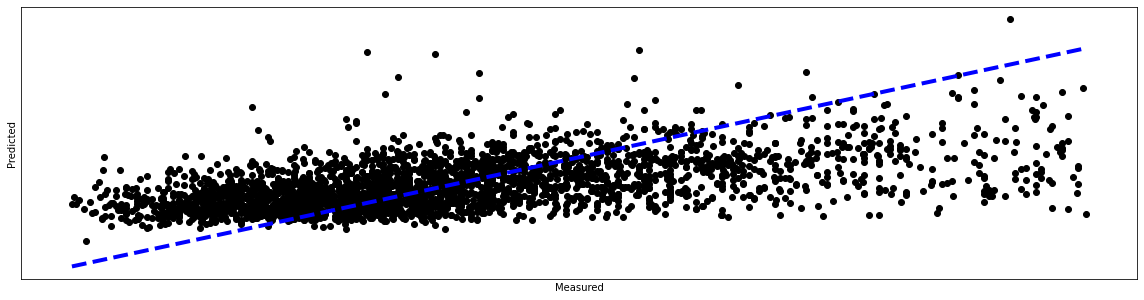

In [25]:

# Plot outputs
plt.figure(figsize=(20, 5))
plt.scatter(label_test, label_pred, color='black')
plt.plot([label_test.min(), label_test.max()], [label_test.min(), label_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

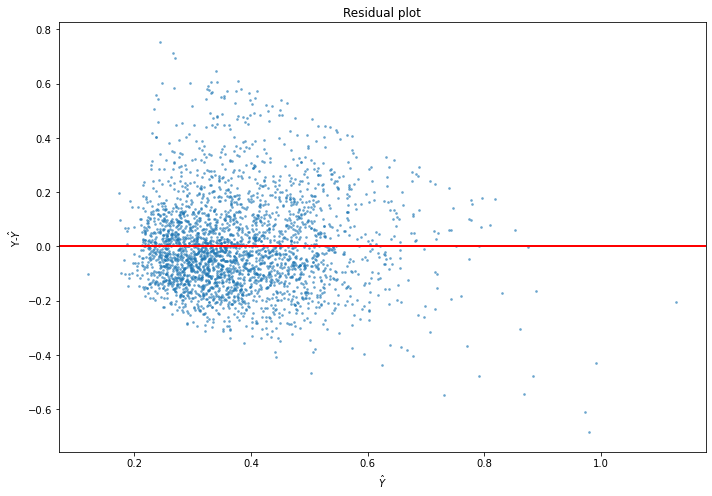

In [26]:
# Residual plot

plt.figure(figsize=(10, 7))

resid = label_test - regr.predict(features_test)

plt.axhline(y=0, linestyle='-', linewidth=2, color="r")
plt.scatter(x=label_pred, y=resid, alpha=0.5, s=3)

plt.title("Residual plot")
plt.ylabel(r"Y-$\hat Y$")
plt.xlabel(r'$\hat Y$')
plt.tight_layout()
plt.show()

### 7. Export

In [27]:
# Download model as pkl file

import joblib
joblib.dump(regr, 'regr.pkl')

['regr.pkl']

# HOMEWORK 1

### 6. Train Test Split

   SOLDPRICE  BEDS  BATHS  SQFT  AGE   LOTSIZE  GARAGE
0   247000.0    12    4.0  4772  118    8350.0       0
1   525000.0     3    3.0  2774   28  106286.0       2
2   479000.0     3    2.5  2000    1   30000.0       2
3   176505.0     2    1.0     0    0       0.0       0
4   530000.0     3    2.5  2639   15   18730.0       2
Test data variance score: 0.29
Train data variance score (If train data was given as input): 0.30


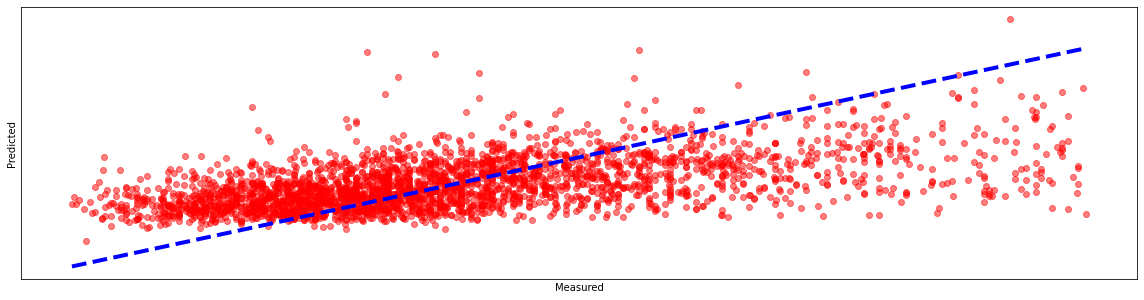

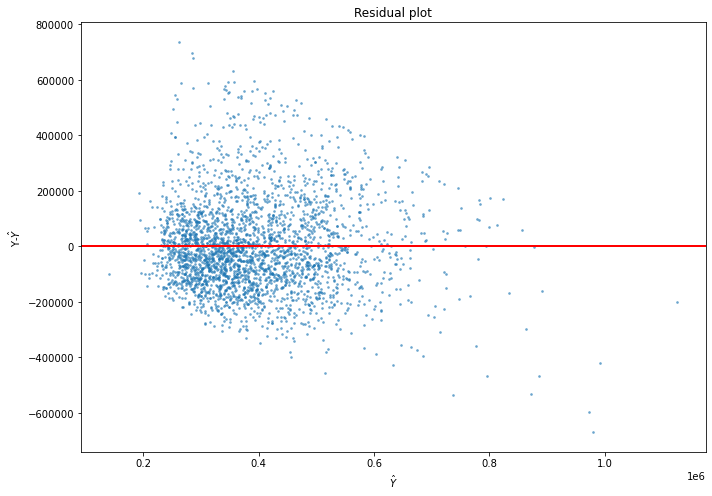

['regression.pkl']

In [28]:
# YOUR TURN
# Use sklearn train|test|split
# Ref. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Init x, y test,train @ 33% size (sklearn)
label = ['SOLDPRICE']
features = ['BEDS', 'BATHS', 'SQFT', 'AGE', 'LOTSIZE', 'GARAGE']
filter_data = data.copy()
filter_data = filter_data[filter_data['SOLDPRICE'] < 1000000]
filter_data = data.copy()

# Additional
filter_data = filter_data[filter_data['SOLDPRICE'] < 1000000]


# Apply to all
for f in features:
    # Out empties - (v. imputation)
    filter_data = filter_data[filter_data[f].notna()]
    
    # Interaction terms
    
    # Standardize
    #filter_data[f] = (filter_data[f] - filter_data[f].mean()) / filter_data[f].std()
    
    # v. Normalize
    #filter_data[f] = (filter_data[f] - filter_data[f].min()) / (filter_data[f].max() - filter_data[f].min())
    
filter_data = filter_data[filter_data['SOLDPRICE'].notna()]
filter_data = filter_data.reset_index()

print(filter_data[label + features].head())
label = filter_data[label]
features = filter_data[features]   



split = int(len(filter_data) * 0.25)

features_train = features[:split]
features_test = features[split:]
label_train = label[:split]
label_test = label[split:]
# Determine linear_model (sklearn - above))
regr = linear_model.LinearRegression()

# Train linear_model (sklearn)
try:
    regr.fit(features_train, label_train) # Sometimes there is an error here. I'm not sure why, but running this function again fixes it.
except:
    regr.fit(features_train, label_train)
label_pred = regr.predict(features_test)
# Score Method 1: (sklearn)
# Ref. https://stackoverflow.com/questions/45529907/difference-between-model-score-vs-r2-score
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
print("Test data variance score: %.2f" % r2_score(label_test, label_pred))
# Score Method 2 (sklearn)
print("Train data variance score (If train data was given as input): %.2f" % regr.score(features_train, label_train))

# Plot outputs (matplotlab - above)
plt.figure(figsize=(20, 5))
plt.scatter(label_test, label_pred, color='red', alpha=0.5)
plt.plot([label_test.min(), label_test.max()], [label_test.min(), label_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

#Residual plot
plt.figure(figsize=(10, 7))
resid = label_test - regr.predict(features_test)

plt.axhline(y=0, linestyle='-', linewidth=2, color="r")
plt.scatter(x=label_pred, y=resid, alpha=0.5, s=3)

plt.title("Residual plot")
plt.ylabel(r"Y-$\hat Y$")
plt.xlabel(r'$\hat Y$')
plt.tight_layout()
plt.show()
# Download model as pkl file
import joblib
joblib.dump(regr, 'regression.pkl')

### 7. Decision Tree

262965.453021978       SOLDPRICE
0      247000.0
1      525000.0
2      479000.0
3      176505.0
4      530000.0
...         ...
1274   542000.0
1275   410000.0
1276   540500.0
1277   450500.0
1278   335000.0

[1279 rows x 1 columns]
Test data variance score: 0.26
Train data variance score(If train data was given as input): 0.38


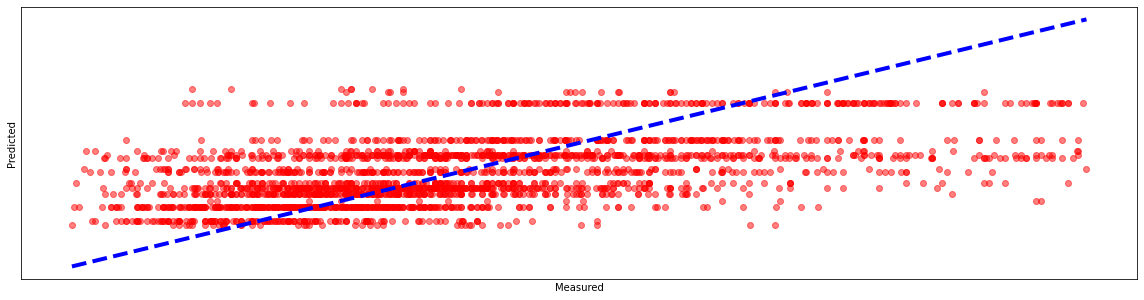

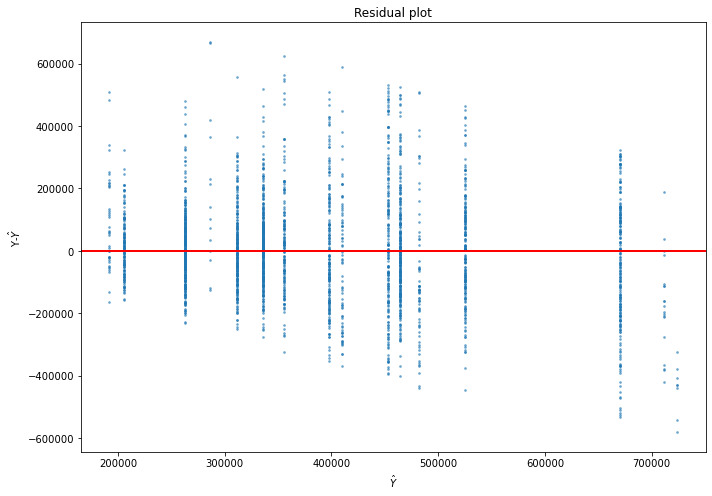

[311200.45833333]


In [29]:
# YOUR TURN
# Run DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
# HINT: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

label = ['SOLDPRICE']
features = ['BEDS', 'BATHS', 'SQFT', 'AGE', 'LOTSIZE', 'GARAGE']
filter_data = data.copy()
filter_data = filter_data[filter_data['SOLDPRICE'] < 1000000]
for f in features:
    filter_data = filter_data[filter_data[f].notna()]
    #filter_data[f] = (filter_data[f] - filter_data[f].mean()) / filter_data[f].std()
    #filter_data[f] = (filter_data[f] - filter_data[f].min()) / (filter_data[f].max() - filter_data[f].min())
filter_data = filter_data[filter_data['SOLDPRICE'].notna()]
filter_data = filter_data[filter_data['SOLDPRICE'] > 0]
filter_data = filter_data.reset_index()
label = filter_data[label]
features = filter_data[features]

split = int(len(filter_data)*(1/3))
features_train = features[:split]
features_test = features[split:]
label_train = label[:split]
label_test = label[split:]
# Create regressor
regressor = tree.DecisionTreeRegressor(min_samples_split= 0.15)
# Fit
regressor.fit(features_train, label_train)
# Predictions
prediction = regressor.predict(features_test)
print(prediction[1], label_train)
# Score
print("Test data variance score: %.2f" % r2_score(label_test, prediction))
print("Train data variance score(If train data was given as input): %.2f" % regressor.score(features_train, label_train))
# Plot outputs (matplotlab - above)
plt.figure(figsize=(20, 5))
plt.scatter(label_test, prediction, color='red', alpha=0.5)
plt.plot([label_test.min(), label_test.max()], [label_test.min(), label_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()
#Residual plot
plt.figure(figsize=(10, 7))
resid = label_test - [regressor.predict(features_test)]

plt.axhline(y=0, linestyle='-', linewidth=2, color="r")
plt.scatter(x=prediction, y=resid, alpha=0.5, s=3)

plt.title("Residual plot")
plt.ylabel(r"Y-$\hat Y$")
plt.xlabel(r'$\hat Y$')
plt.tight_layout()
plt.show()

# Download model as pkl file
import joblib
joblib.dump(regressor, 'regressionWithTree.pkl')
treeModel = joblib.load('./regressionWithTree.pkl')
treePredict = treeModel.predict([[3, 1.5, 1297, 98, 4800.0, 1]])
treePredict = str(treePredict)
print(treePredict)

### Ref
    + https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame